# 몽고 DB로 부터 테스트 데이터 불러오기

In [1]:
from newscrawl.newscrawl import MongoDB
import pandas as pd

naver_col = MongoDB.conn_mongodb('naver')
daum_col = MongoDB.conn_mongodb('daum')

In [2]:
naver_cursor = naver_col.find()
daum_cursor = daum_col.find()
naver_cursor

In [3]:
naver_df =  pd.DataFrame(list(naver_cursor))
daum_df = pd.DataFrame(list(daum_cursor))

In [4]:
naver_df.head()

,_id,press,title,section,keywords,crawl_time
0,60d44e703bd7c67757f3ad2d,KBS,이주열 “연내 적절한 시점부터 통화정책 정상화”,headline,"[이주열, 연내, 시점, 통화정책, 정상화]",2021-06-24 18:20:48.794
1,60d44e703bd7c67757f3ad2e,헤럴드경제,우주선도 아니고 풍선인데…6시간 우주여행에 1억4천만원,it,"[우주선, 풍선, 우주여행]",2021-06-24 18:20:48.869
2,60d44e703bd7c67757f3ad2f,블로터,삼성전자의 WOLED 채택 가능성 '솔솔'...LG디스플레이엔 ‘기회’,it,"[전자, WOLED, 채택, 가능성, 솔솔, LG, 디스플레이, 기회]",2021-06-24 18:20:48.945
3,60d44e703bd7c67757f3ad30,머니투데이,"'동료 잃은 슬픔' 한 달…길어지는 네이버 조사, 결론은?",it,"[동료, 슬픔, 달, 네이버, 조사, 결론]",2021-06-24 18:20:48.954
4,60d44e713bd7c67757f3ad31,연합뉴스,"""1평 전화부스서 일·식사해라""…크래프톤도 '직장 괴롭힘' 발생(종합)",it,"[평, 전화, 부스, 일, 식사, 크래프톤, 직장, 괴롭힘, 발생, 종합]",2021-06-24 18:20:49.037


In [5]:
daum_df.head()

,_id,press,title,section,keywords,crawl_time
0,60d44e6f3bd7c67757f3ad0a,한겨레,"헌재, 윤석열 낸 검사징계법 헌법소원 '각하'..""직접성 없어""",society,"[헌재, 윤석열, 검사, 징계, 법, 헌법소원, 각하, 직접]",2021-06-24 18:20:47.839
1,60d44e6f3bd7c67757f3ad0b,뉴시스,"신세계, 3.4조에 이베이코리아 인수..e커머스 2위로 도약(종합)",economy,"[신세계, 에, 이베이, 코리아, 인수, e, 커머스, 위로, 도약, 종합]",2021-06-24 18:20:47.895
2,60d44e6f3bd7c67757f3ad0c,뉴시스,"김종인 ""윤석열 석 달간 잡음 일으켜"" 실망",politics,"[김종인, 윤석열, 석, 달, 잡음, 실망]",2021-06-24 18:20:47.908
3,60d44e6f3bd7c67757f3ad0d,머니투데이,"""안타까워 거둬준 20대 의붓아들, 10살 친딸 수개월 성폭행""",society,"[준, 의붓아들, 살, 친딸, 개월, 성폭행]",2021-06-24 18:20:47.921
4,60d44e6f3bd7c67757f3ad0e,연합뉴스,"문대통령, 유공자·보훈가족 靑초청..""국빈 맞는 마음""(종합)",politics,"[대통령, 유공, 보훈, 가족, 靑, 초청, 국빈, 마음, 종합]",2021-06-24 18:20:47.929


# 워드클라우드를 통해 언급되는 키워드 확인

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import re
import collections

font_path = '/home/keyog/coding/main-news-analys/BMDOHYEON.ttf'

naver_keywords_str = ''
for keyword in naver_df['keywords'] :
    naver_keywords_str += ' '.join(keyword)

daum_keywords_str = ''
for keyword in daum_df['keywords'] :
    daum_keywords_str += ' '.join(keyword)
    
spwords = set(STOPWORDS)
wc = WordCloud(max_font_size = 200,
               stopwords = spwords,
               font_path = font_path,
               background_color = 'white',
               width = 800, height = 800)

wc.generate(naver_keywords_str+' '+daum_keywords_str)

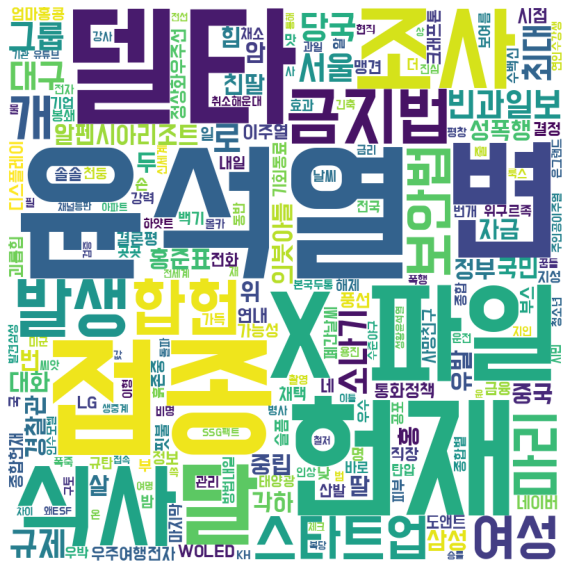

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [8]:
naver_df['press'].value_counts().index

Index(['연합뉴스', '서울신문', '뉴스1', '서울경제', 'MBN', '한국경제', '세계일보', 'KBS', '중앙일보',
       '이데일리', '파이낸셜뉴스', '머니투데이', '헤럴드경제', '더팩트', '데일리안', '국민일보', '한국경제TV',
       '경향신문', '헬스조선', '블로터', 'SBS', 'SBS Biz'],
      dtype='object')

# 파이차트를 이용해서 언론사별 언급 percent 확인

In [9]:
fontprop = fm.FontProperties(fname=font_path, size=18)
matplotlib.rc('font',family=fontprop.get_name())


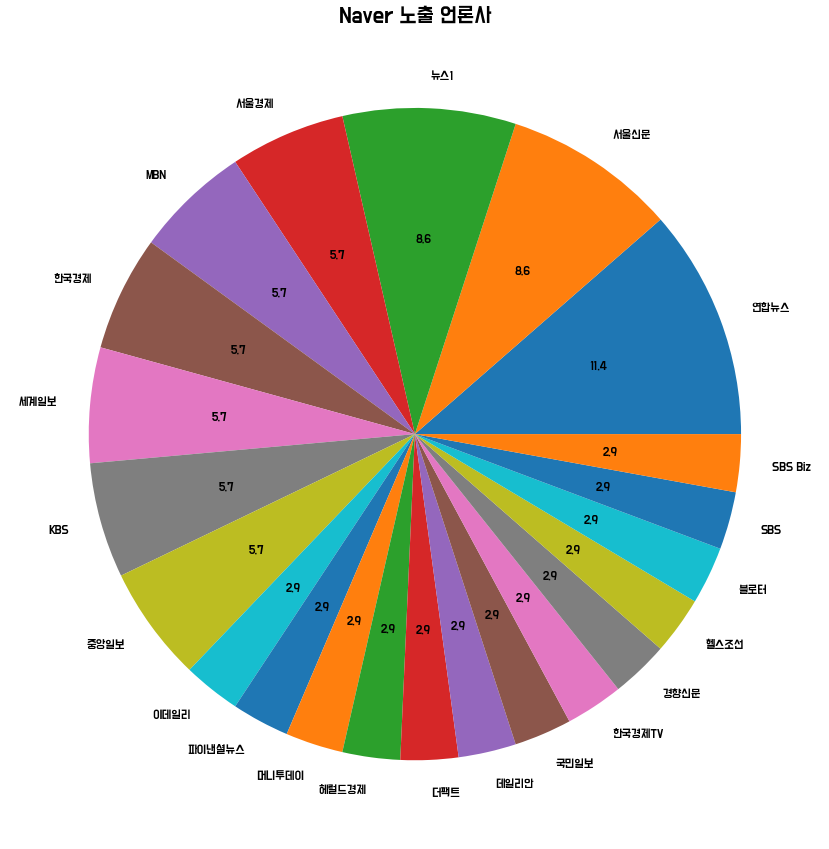

In [10]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Naver 노출 언론사',fontproperties=fontprop)
plt.pie(naver_df['press'].value_counts(),autopct="%.1f",labels=naver_df['press'].value_counts().index)
plt.show()

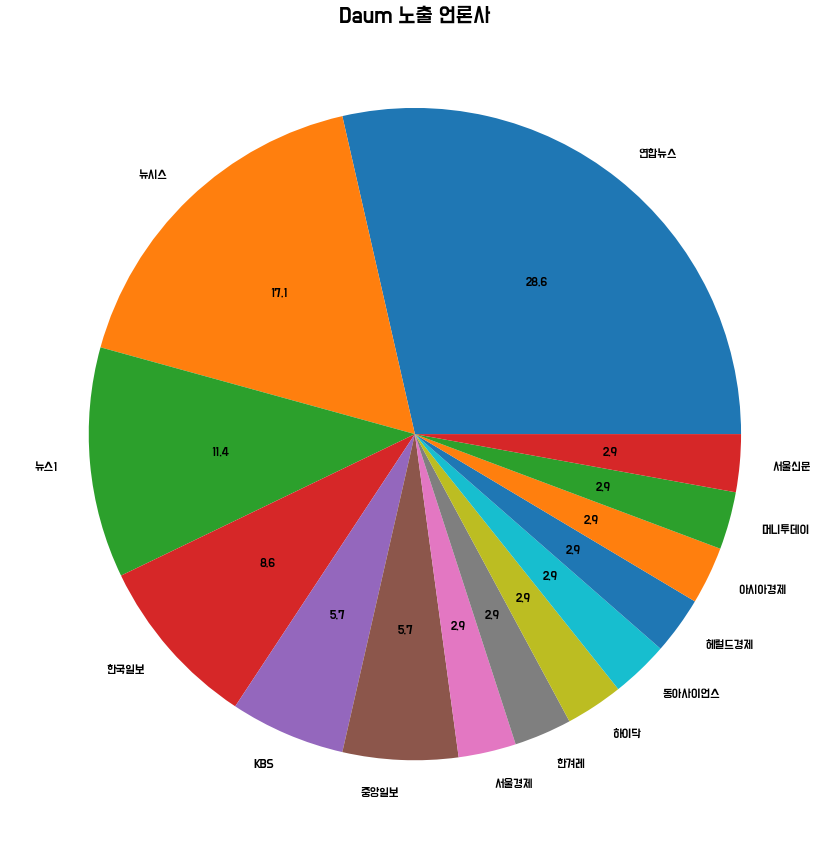

In [11]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Daum 노출 언론사',fontproperties=fontprop)
plt.pie(daum_df['press'].value_counts(),autopct="%.1f",labels=daum_df['press'].value_counts().index)
plt.show()

In [12]:
naver_daum_df = pd.concat([naver_df,daum_df])

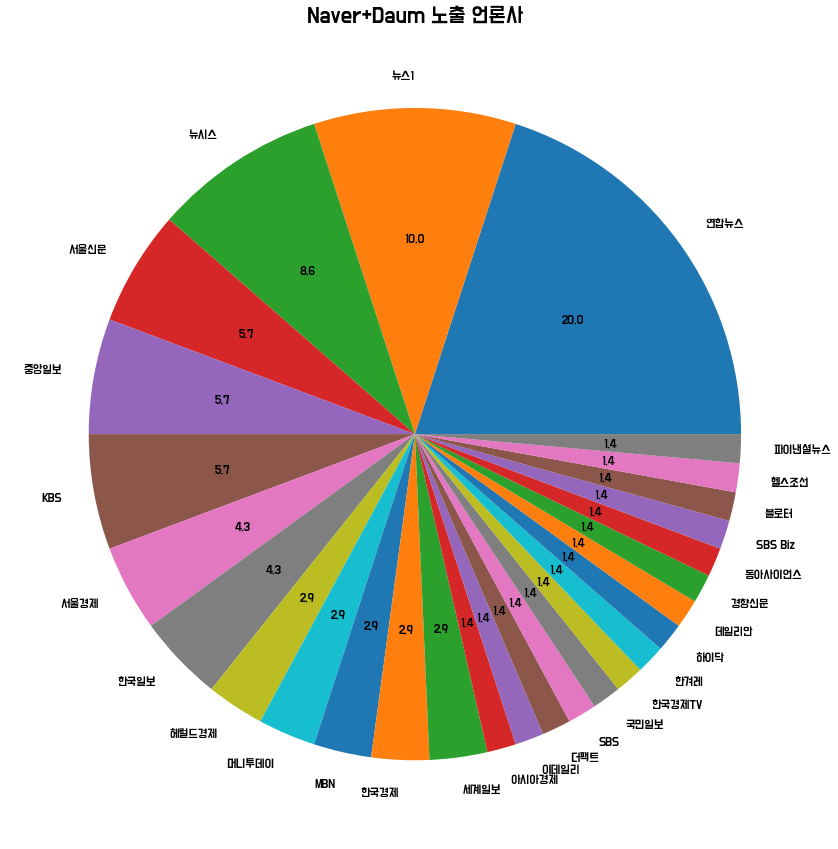

In [13]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Naver+Daum 노출 언론사',fontproperties=fontprop)
plt.pie(naver_daum_df['press'].value_counts(),autopct="%.1f",labels=naver_daum_df['press'].value_counts().index)
plt.show()

# 1시간마다 업데이트되는 사항을 확인하기

In [14]:
from datetime import datetime

time_arr = range(24)
time_dict = dict()
def get_dataframe(cursor) :
    return pd.DataFrame(list(cursor))

def get_total(df1,df2) :
    return pd.concat([df1,df2])

def today_feature(day=str(datetime.now()).split(" ")[0]):
    '''
    날짜를 지정하기 위해서 다음 형식에 따라서 파라미터 입력
    YYYY-MM-DD -> 2021-03-04
    '''
    for hour in time_arr :
        naver = f'naver_{day}T{hour}'
        daum = f'daum_{day}T{hour}'
        total = f'total_{day}T{hour}'
        
        naver_cursor = MongoDB.conn_mongodb(naver).find()
        daum_cursor = MongoDB.conn_mongodb(daum).find()
        
        time_dict[naver] = get_dataframe(naver_cursor)
        time_dict[daum] = get_dataframe(daum_cursor)
        time_dict[total] = get_total(time_dict[naver],time_dict[daum])

In [15]:
from collections import Counter
def keyword_top10(df) :
    keyword_tmp = []
    for keyword in df['keywords'] :
        keyword_tmp += keyword
    counts = Counter(keyword_tmp)
    return [word[0] for word in counts.most_common(10)]

In [16]:
def press_top3(df) :
    return list(df['press'].value_counts().index[:3])

In [17]:
def today_analys() :
    today_feature()
    for date,df in time_dict.items() :
        if len(df) != 0 :
            print(date)
            k_top10 = keyword_top10(df)
            print('---언급 키워드 top10---')
            print('->',k_top10)
            p_top3 = press_top3(df)
            print('---언급 언론사 top3---')
            print('->',p_top3)
            print('\n')

In [18]:
today_analys()

naver_2021-06-28T12
---언급 키워드 top10---
-> ['종합', '호', '美', '사망', '이후', '사', '오딘', '故', '사건', '홍콩']
---언급 언론사 top3---
-> ['뉴스1', '동아사이언스', '이데일리']


daum_2021-06-28T12
---언급 키워드 top10---
-> ['실종', '김', '채', '발견', '종합', '고교생', '휘성', '美', '명', '검사']
---언급 언론사 top3---
-> ['연합뉴스', '뉴시스', '뉴스1']


total_2021-06-28T12
---언급 키워드 top10---
-> ['종합', '美', '김', '휘성', '실종', '채', '발견', '명', '비판', '고교생']
---언급 언론사 top3---
-> ['연합뉴스', '뉴스1', '뉴시스']


naver_2021-06-28T13
---언급 키워드 top10---
-> ['부동산', '개발', '명', '장마', '코로나', 'S', '정부', '스마트', '공장', '해임']
---언급 언론사 top3---
-> ['한국경제', 'YTN', '세계일보']


daum_2021-06-28T13
---언급 키워드 top10---
-> ['실종', '명', '채', '발견', '김', '요구', '검사', '휘성', '사망', '與']
---언급 언론사 top3---
-> ['연합뉴스', '뉴시스', '뉴스1']


total_2021-06-28T13
---언급 키워드 top10---
-> ['명', '부동산', '실종', '사망', '인사', '채', '발견', '김', '개발', '해임']
---언급 언론사 top3---
-> ['연합뉴스', '뉴스1', '뉴시스']


naver_2021-06-28T14
---언급 키워드 top10---
-> ['대통령', '곳', '中', '소나기', '제주도', '삼성', '왜', '존슨', '부터', '스']
---언급 언론사 top3---